# **Project 2**
Name: Arun Sangar

Course: CPSC 483

---

**Pre-Processing**
---

In [ ]:
import numpy as np
import pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

1. Use Pandas to load the data from Wage.csv and create a scatter plot comparing wage to age. Does there appear to be a relationship?

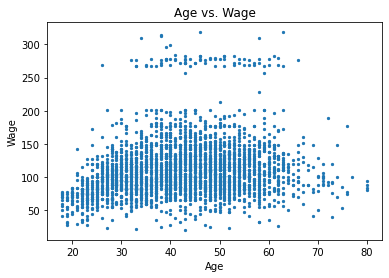

In [ ]:
#read in data
data = pd.read_csv('Wage.csv')
agedata = data[['age']]
wagedata = data[['wage']]

#scatter plot of age vs wage
%matplotlib inline
plt.title('Age vs. Wage')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.scatter(agedata, wagedata, s=5)
plt.show()

2. Use sklearn.model_selection.train_test_split to set aside 20% of the data as a test set.

In [ ]:
#split data into training and test sets for cross validation
X_train, X_test, t_train, t_test = train_test_split(agedata, wagedata, test_size=0.2, random_state=42)

**Linear Regression**
---

3. Use sklearn.linear_model.LinearRegression to fit wage as a function of age. List the coefficients of the model, and plot the line against the scatterplot from experiment above.

Coefficients:  [[0.73941741]]
Intercept:  [80.61660583]


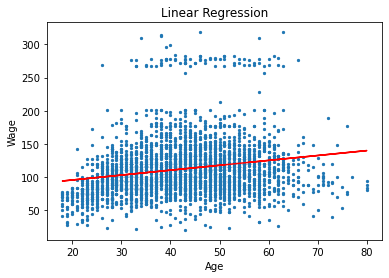

In [ ]:
#create linear model
lr = LinearRegression().fit(X_train, t_train)

#list the coefficients
print("Coefficients: ", lr.coef_)
print("Intercept: ", lr.intercept_)

#scatter plot with best fit line
%matplotlib inline
plt.title('Linear Regression')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.scatter(agedata, wagedata, s=5)
plt.plot(X_train, lr.predict(X_train), color = '#ff0000')
plt.show()

4. Predict wages for each of the items in your test set, and score them against the targets. What does R2 tell you about how well the model fits the data?

In [ ]:
#score the linear regression model using the test sets
print("Coefficient of Determination (R2): ", lr.score(X_test,t_test))

Coefficient of Determination (R2):  0.026238249805747182


**Polynomial Regression**
---

5. Use sklearn.preprocessing.PolynomialFeatures along with LinearRegression to fit a 4th order polynomial to the same data. Plot the resulting polynomial, and compare R2 to the previous model.

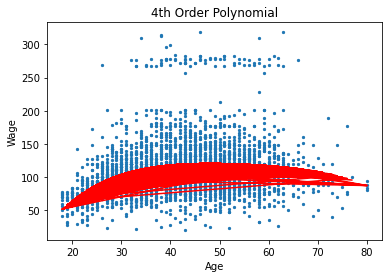

Coefficient of Determination (R2):  0.07655382309592762


In [ ]:
#polynomial model setup
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

#create polynomial model
pr = LinearRegression().fit(X_train_poly, t_train)

#scatter plot with best fit line
%matplotlib inline
plt.title('4th Order Polynomial')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.scatter(agedata, wagedata, s=5)
plt.plot(X_train, pr.predict(X_train_poly), color = '#ff0000')
plt.show()

#score the polynomial regression model using the test sets
print("Coefficient of Determination (R2): ", pr.score(X_test_poly,t_test))

**Ridge Regression**
---

6. Add L2 regularization by using sklearn.linear_model.Ridge with α = 0.1 to fit a 4th order polynomial. How do the coefficients compare to those in experiment (4) above? How does R2 compare?

In [ ]:
#create ridge regression model (normalize data)
rr = Ridge(alpha=0.1, normalize=True).fit(X_train_poly,t_train)
print("Coefficients: ", rr.coef_)
print("Coefficient of Determination (R2): ", rr.score(X_test_poly,t_test))

Coefficients:  [[ 0.00000000e+00  1.11243215e+00  4.04021320e-03 -3.90074703e-05
  -1.57919659e-06]]
Coefficient of Determination (R2):  0.05765754143209578


7. Use sklearn.linear_model.RidgeCV to find the best value for α across the range 0.001, 0.002, 0.004, 0.01, 0.02, 0.04, 0.1, 0.2, 0.4, 1.0.

In [ ]:
#find best value for alpha
rrcv = RidgeCV(alphas=[0.001, 0.002, 0.004, 0.01, 0.02, 0.04, 0.1, 0.2, 0.4, 1.0]).fit(X_train_poly, t_train)
print("Best value for alpha: ", rrcv.alpha_)

Best value for alpha:  1.0


**Add Feature**
---

8. Are there any other fields in the data that might be related to wage? 
Add at least one of these columns to your training and testing sets and see whether you can improve your predictions.

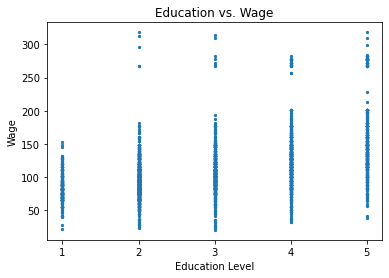

In [ ]:
#add education as a feature
x = data[['age', 'education']]

#transform education into numerical feature (1-5)
x['education'] = x['education'].str[0]

#plot to see if a relation exists
sorted_data = data.sort_values(['education'])
sorted_data['education'] = sorted_data['education'].str[0]
%matplotlib inline
plt.title('Education vs. Wage')
plt.xlabel('Education Level')
plt.ylabel('Wage')
plt.scatter(sorted_data['education'], sorted_data['wage'], s=5)
plt.show()

In [ ]:
#split data into training and test sets for cross validation
X_train, X_test, t_train, t_test = train_test_split(x, wagedata, test_size=0.2, random_state=42)

In [ ]:
#create linear model
lr = LinearRegression().fit(X_train, t_train)
print("Coefficient of Determination (R2): ", lr.score(X_test,t_test))

Coefficient of Determination (R2):  0.27394728344667907


In [ ]:
#polynomial model setup
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

#create polynomial model
pr = LinearRegression().fit(X_train_poly, t_train)

#score the polynomial regression model using the test sets
print("Coefficient of Determination (R2): ", pr.score(X_test_poly,t_test))

Coefficient of Determination (R2):  0.313166297283095


In [ ]:
#create ridge regression model (normalize data)
rr = Ridge(alpha=0.1, normalize=True).fit(X_train_poly,t_train)
print("Coefficient of Determination (R2): ", rr.score(X_test_poly,t_test))

Coefficient of Determination (R2):  0.3065647138744294


In [ ]:
#find best value for alpha
rrcv = RidgeCV(alphas=[0.001, 0.002, 0.004, 0.01, 0.02, 0.04, 0.1, 0.2, 0.4, 1.0]).fit(X_train_poly, t_train)
print("Best value for alpha: ", rrcv.alpha_)

Best value for alpha:  1.0
